In [1]:
'''
1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

'''

'\n1) Prepare a classification model using SVM for salary data \n\nData Description:\n\nage -- age of a person\nworkclass\t-- A work class is a grouping of work \neducation\t-- Education of an individuals\t\nmaritalstatus -- Marital status of an individulas\t\noccupation\t -- occupation of an individuals\nrelationship -- \t\nrace --  Race of an Individual\nsex --  Gender of an Individual\ncapitalgain --  profit received from the sale of an investment\t\ncapitalloss\t-- A decrease in the value of a capital asset\nhoursperweek -- number of hours work per week\t\nnative -- Native of an individual\nSalary -- salary of an individual\n\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/09/2023  01:40 AM           391,960  Naive Bayes_Salary.ipynb
08/11/2023  09:20 PM    <DIR>          .
08/02/2023  05:51 PM    <DIR>          ..
08/11/2023  08:23 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
08/02/2023  02:05 PM            30,582 Afinn.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/11/2023  05:43 PM           397,941 ANN_FireForests.ipynb
08/01/2023  03:25 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:29 PM           182,205 apriori algorithm-my_movies.ipynb
08/02/2023  10:55 AM               247 Assignment.txt
07/26/2023  06:03 PM         4,610,348 ba

In [4]:
train_data = pd.read_csv('SalaryData_Train_SVM.csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
train_data.shape

(30161, 14)

In [6]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

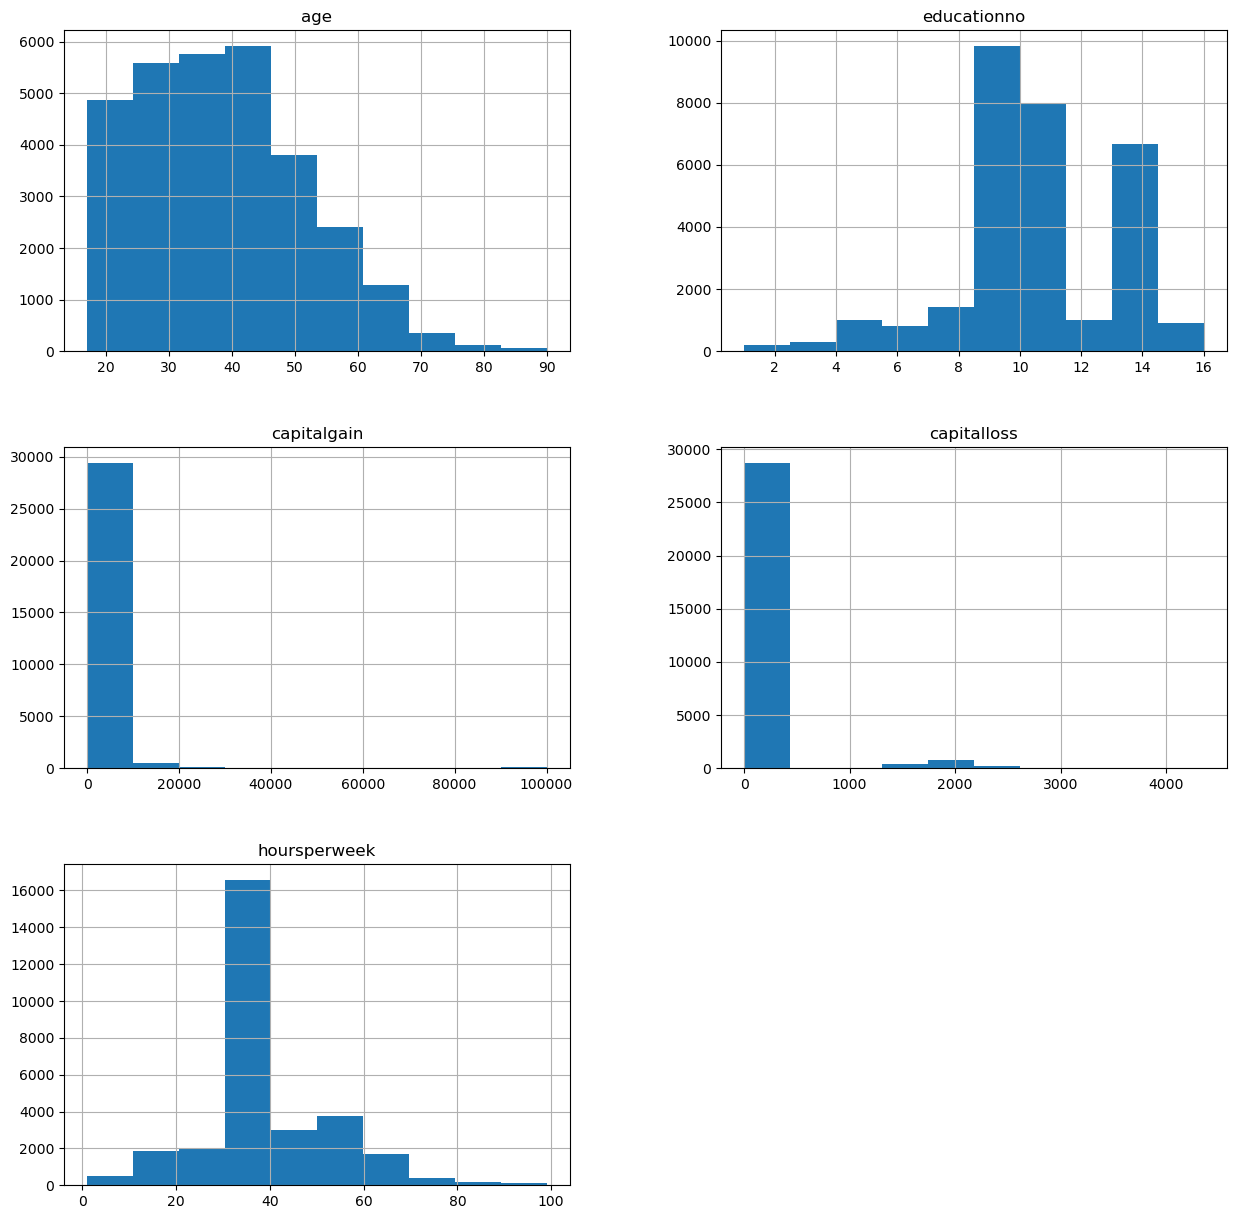

In [9]:
train_data.hist(figsize=(15,15), bins=10)

In [10]:
test_data = pd.read_csv('SalaryData_Test_SVM.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
test_data.shape

(15060, 14)

In [12]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

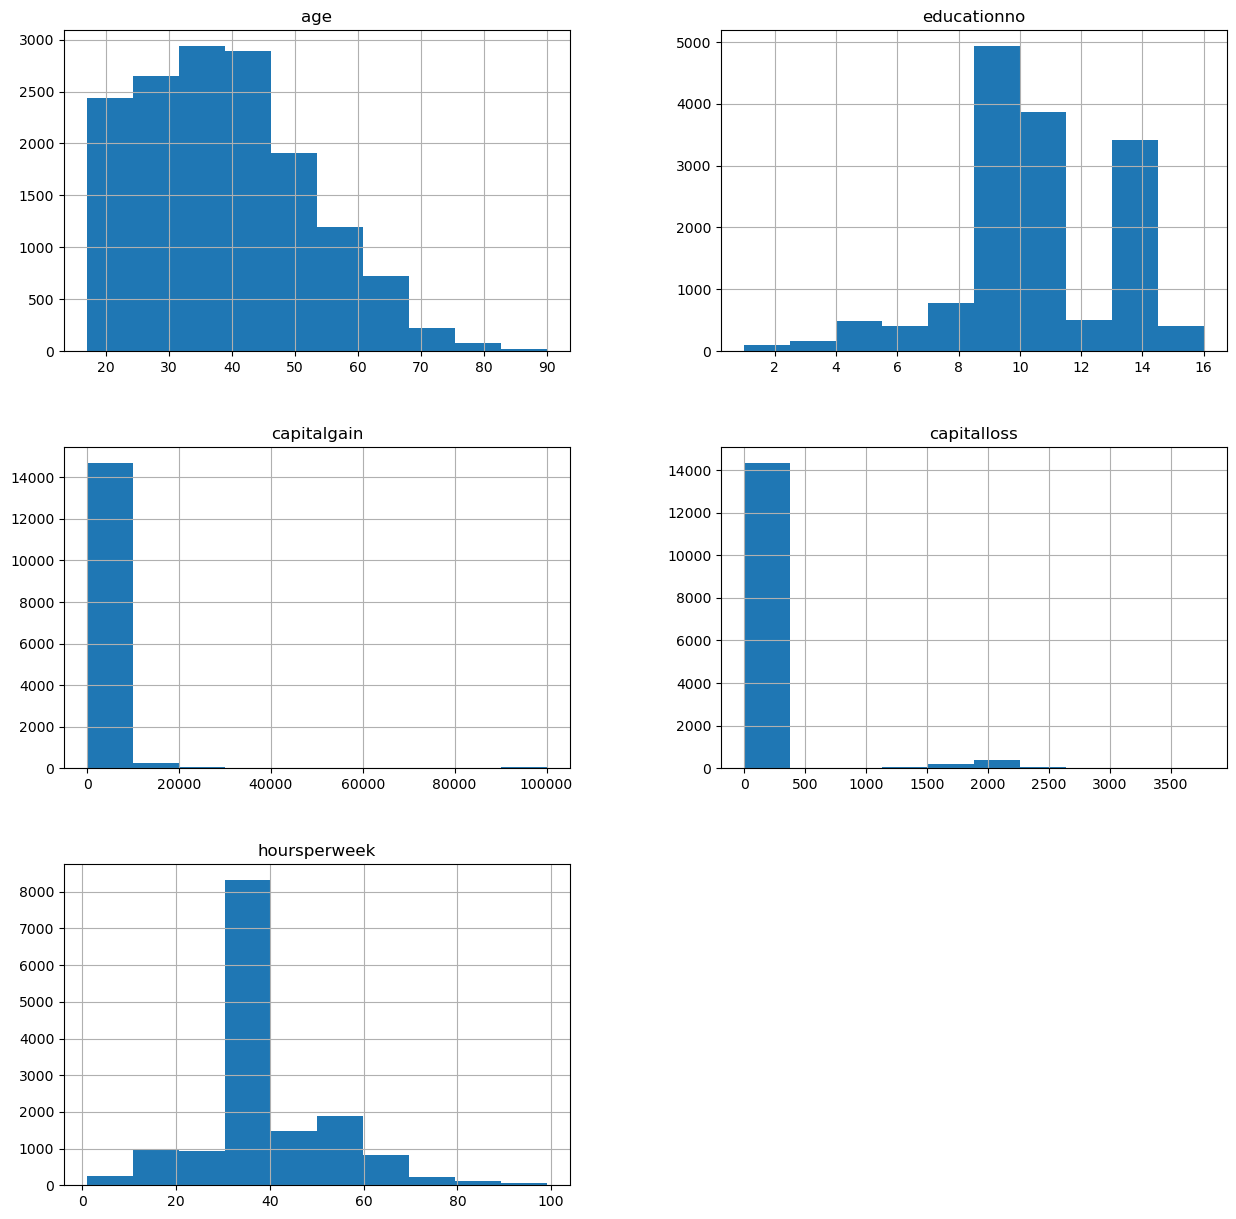

In [14]:
test_data.hist(figsize=(15,15), bins=10)

In [15]:
# Merging Train and Test Data

data=train_data.append(test_data)
data.reset_index(inplace=True,drop=True)
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [16]:
data.shape

(45221, 14)

In [17]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
data['Salary'].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

Text(0.5, 1.0, '<=50K vs >50K')

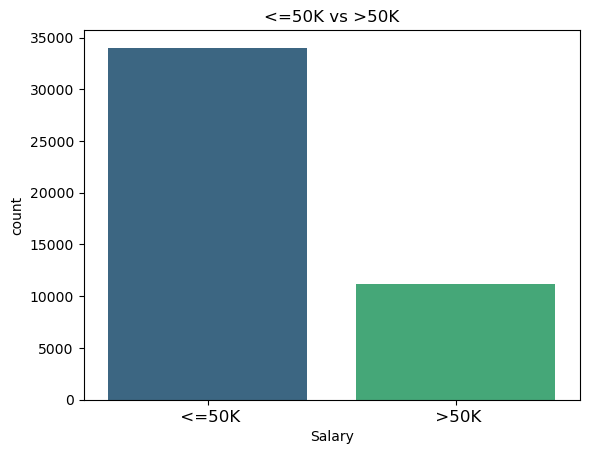

In [19]:
sns.countplot(x='Salary', data=data, palette='viridis',order=data['Salary'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('<=50K vs >50K')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [21]:
corr=data.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


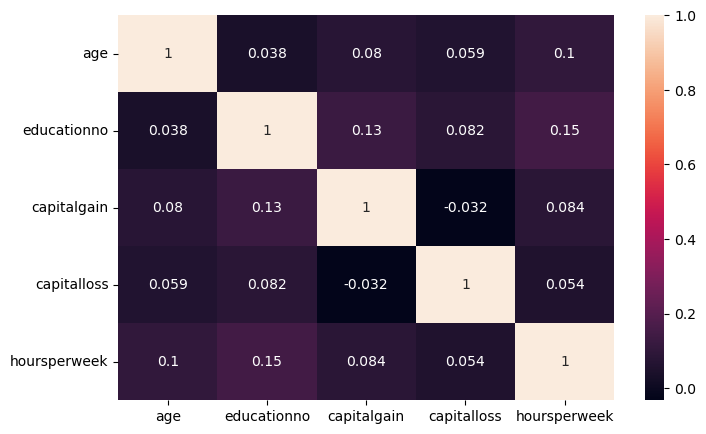

In [22]:
fig= plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True);

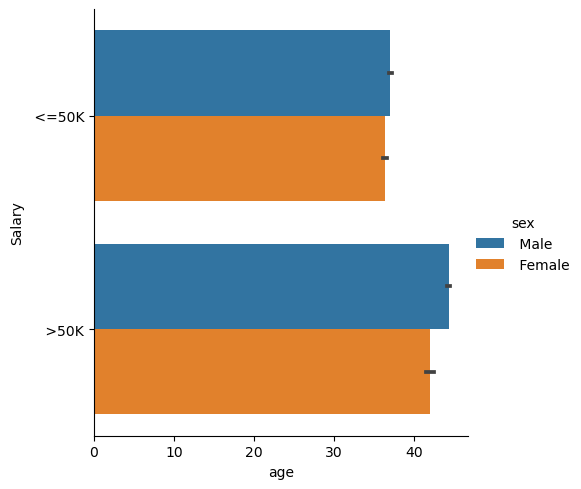

In [23]:
sns.catplot(data=data, x="age", y="Salary", hue="sex", kind="bar")

<Axes: xlabel='workclass', ylabel='count'>

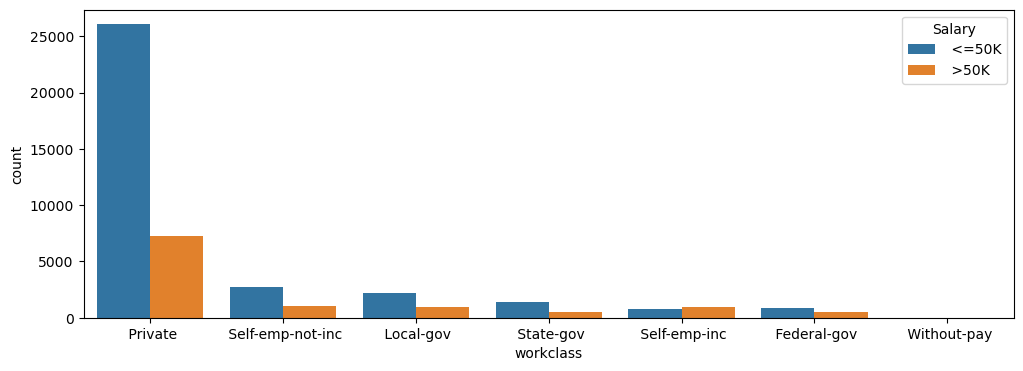

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(data=data, x="workclass",hue="Salary",order=data['workclass'].value_counts().index)


<Axes: xlabel='education', ylabel='count'>

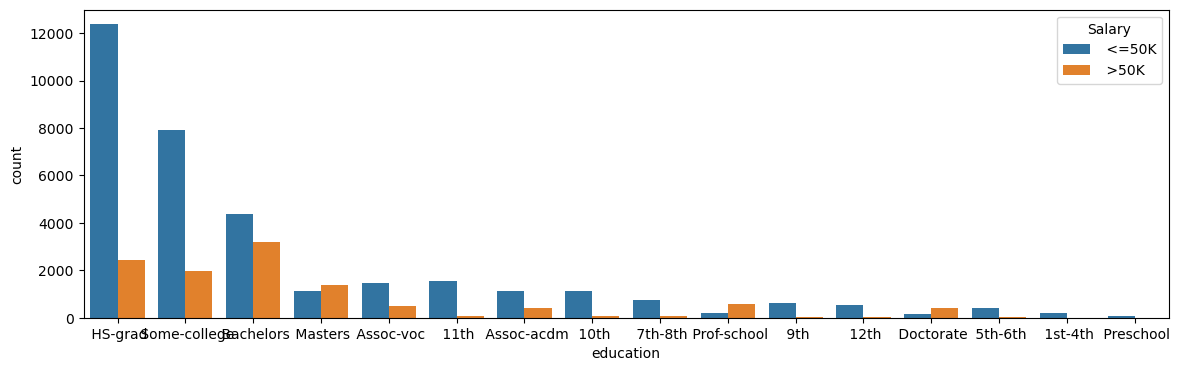

In [25]:
plt.figure(figsize=(14,4))
sns.countplot(data=data, x="education",hue="Salary",order=data['education'].value_counts().index)

<Axes: xlabel='maritalstatus', ylabel='count'>

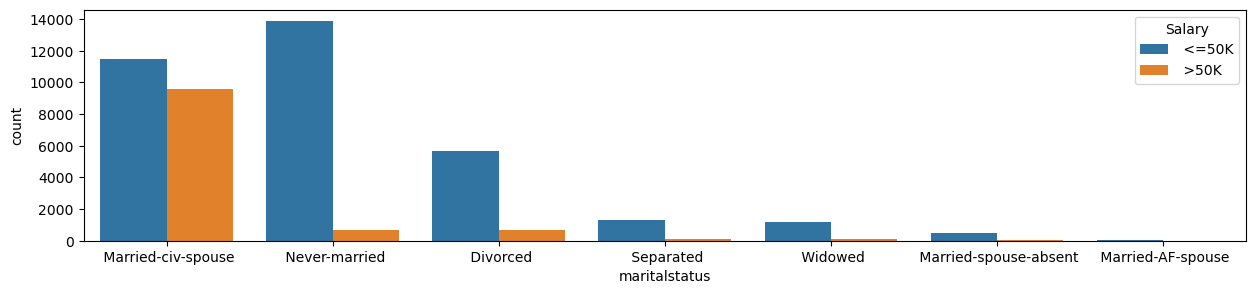

In [26]:
plt.figure(figsize=(15,3))
sns.countplot(data=data, x="maritalstatus",hue="Salary",order=data['maritalstatus'].value_counts().index)

<Axes: xlabel='occupation', ylabel='count'>

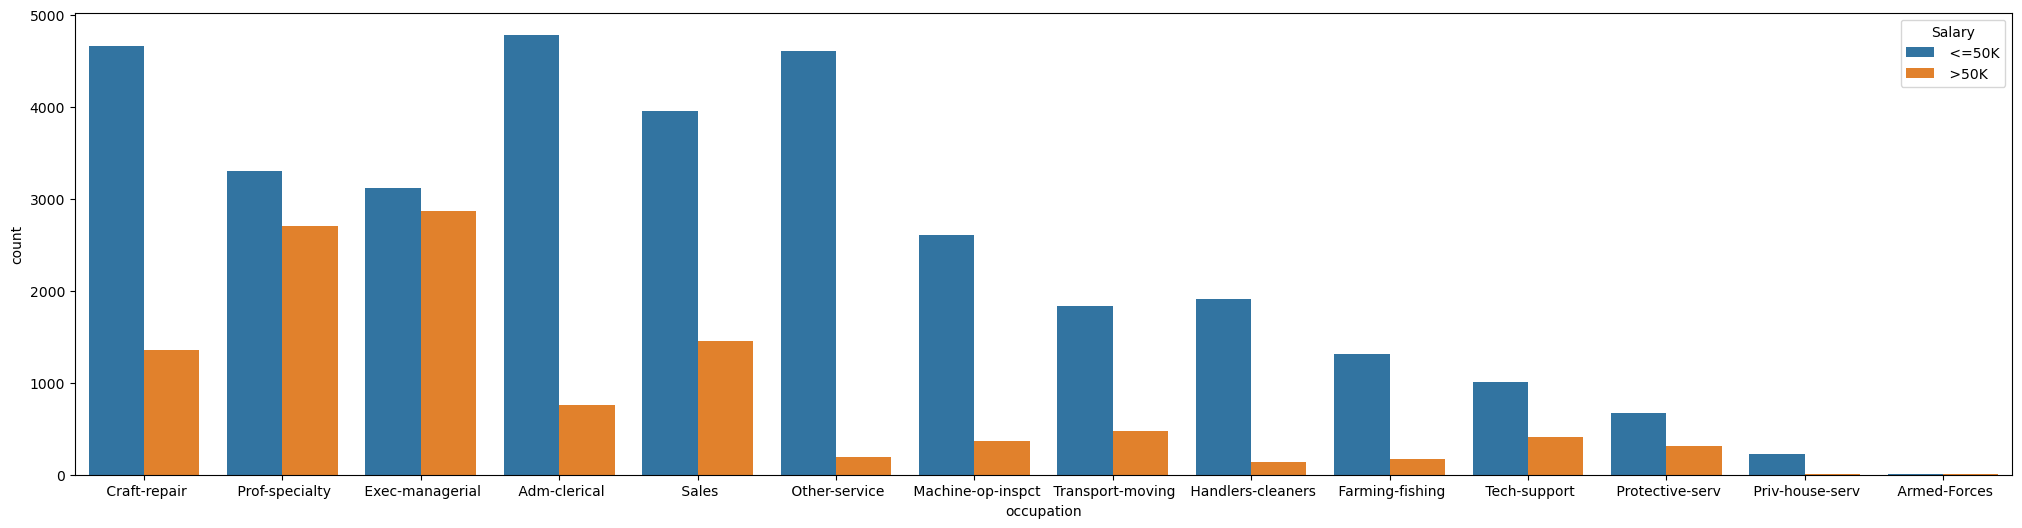

In [27]:
plt.figure(figsize=(25,6))
sns.countplot(data=data, x="occupation",hue="Salary",order=data['occupation'].value_counts().index)

<Axes: xlabel='relationship', ylabel='count'>

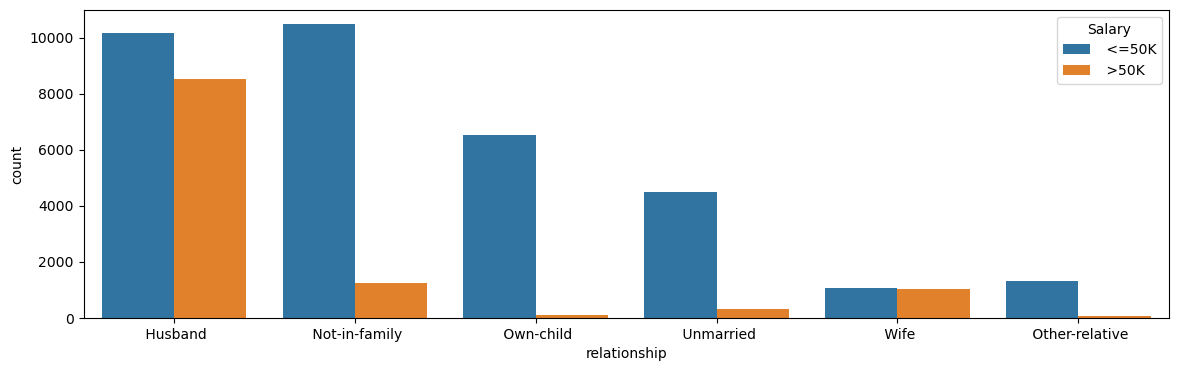

In [28]:
plt.figure(figsize=(14,4))
sns.countplot(data=data, x="relationship",hue="Salary",order=data['relationship'].value_counts().index)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [30]:
from sklearn import preprocessing
 
# label_encoder
label_encoder = preprocessing.LabelEncoder()

data["workclass"]=label_encoder.fit_transform(data["workclass"])
data["education"]=label_encoder.fit_transform(data["education"])
data["maritalstatus"]=label_encoder.fit_transform(data["maritalstatus"])
data["occupation"]=label_encoder.fit_transform(data["occupation"])
data["race"]=label_encoder.fit_transform(data["race"])
data["sex"]=label_encoder.fit_transform(data["sex"])
data["relationship"]=label_encoder.fit_transform(data["relationship"])
data["native"]=label_encoder.fit_transform(data["native"])
data["Salary"]=label_encoder.fit_transform(data["Salary"])

In [31]:
data['Salary'].value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

In [32]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [33]:
#Split the data into train and test 

In [34]:
X=data.iloc[:,:13]
Y=data.iloc[:,-1]

In [35]:

X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,13,4,9,3,4,1,0,0,40,37
45217,39,2,9,13,0,9,1,4,0,0,0,36,37
45218,38,2,9,13,2,9,0,4,1,0,0,50,37
45219,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [36]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45219    0
45220    1
Name: Salary, Length: 45221, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31654, 13), (31654,), (13567, 13), (13567,))

In [40]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [41]:
x_train=norm_func(X_train)
x_test=norm_func(X_test)

### SVM Model

In [42]:
#Linear
model_linear = SVC(kernel="linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [43]:
pred_test_linear= model_linear.predict(x_test)

In [44]:
np.mean(pred_test_linear==y_test)

0.8071791847866145

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear)*100)

Accuracy: 80.71791847866146


In [46]:
#Poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [47]:
pred_test_poly = model_poly.predict(x_test)

In [48]:
np.mean(pred_test_poly==y_test)

0.8233950025797891

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_poly)*100)

Accuracy: 82.33950025797891


In [50]:
#rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)

SVC(gamma=0.1, random_state=40)

In [51]:
pred_test_rbf=model_rbf.predict(x_test)

In [52]:
np.mean(pred_test_rbf==y_test)

0.8352620328738851

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_rbf)*100)

Accuracy: 83.52620328738851


In [54]:
#Sigmoid
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)

SVC(gamma=0.1, kernel='sigmoid', random_state=40)

In [55]:
pred_test_sig = model_rbf.predict(x_test)

In [56]:
np.mean(pred_test_sig==y_test) 

0.8352620328738851

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_sig)*100)

Accuracy: 83.52620328738851
